# Nebraska voters mirror national trend

America was built on a two-party system, what eventually became Republicans and Democrats. But Americans are increasingly turning away from the major parties and registering as third parties.The most prominent parties are the Independent Party, which falls under the term, nonpartisan, and the Libertarian Party. Nebraska voters are no exception to the trend. Though the majority of these voters still stand with Republicans and Democrats, an increasing number of Nebraskans register as Nonpartisans or Libertarains.

In [1]:
library(dplyr)
library(ggplot2)
library(scales)
library(reshape2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
growth = read.csv("results_most.csv")

In [3]:
head(growth)
tail(growth)
nrow(growth)

County,Republican,Democrat,Nonpartisan,Libertarian,Year
Adams,10282,5944,2789,3,2008
Antelope,3012,1238,490,1,2008
Arthur,265,66,11,0,2008
Banner,442,62,46,0,2008
Blaine,290,74,25,0,2008
Boone,2475,1203,385,0,2008


,County,Republican,Democrat,Nonpartisan,Libertarian,Year
459,Valley,1919,736,345,8,2016
460,Washington,8261,3203,2814,124,2016
461,Wayne,3308,1108,854,47,2016
462,Webster,1471,569,377,12,2016
463,Wheeler,419,126,57,4,2016
464,York,6724,1800,1509,72,2016


[1] 464

In [4]:
statewidenp <- growth %>%
 select("Nonpartisan", "Year") %>%
 group_by(Year) %>%
 summarize(total = sum(Nonpartisan))

In [5]:
print(statewidenp)

# A tibble: 5 x 2
   Year  total
  <int>  <int>
1  2008 195459
2  2010 212461
3  2012 228361
4  2014 232628
5  2016 246839


The Nebraska Secretary of State has databases that show voter registration and party for every election. The data is inconsistently entered until 2008, when there's a semblance of a pattern.
To get the total number of Nonpartisan voters in Nebraska for every year, I made a new variable that had these two elements. Then, to see the numbers, I just printed the variable.

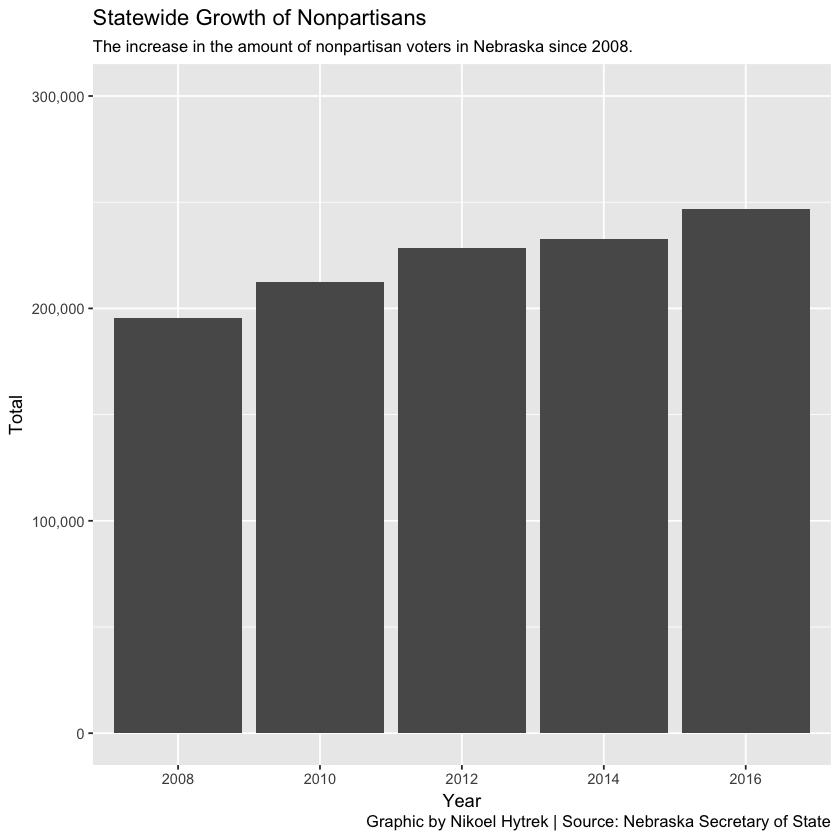

In [22]:
ggplot(statewidenp, aes(x=as.character(Year), weight=total)) + geom_bar() + scale_y_continuous(limits = c(0, 300000), labels = comma) + 
labs(x="Year", y="Total", title="Statewide Growth of Nonpartisans", subtitle="The increase in the amount of nonpartisan voters in Nebraska since 2008.", 
     caption="Graphic by Nikoel Hytrek | Source: Nebraska Secretary of State")

![Chart1](nonpart.jpg)



https://www.dropbox.com/s/u5a1jq9p0xm7whj/nonpart.jpg?dl=0

This shows that the number of Nonpartisan voters has increased steadily since 2008. 
According to Cary Wolbers, a graduate student in the University of Nebraska-Lincoln's political science department, the spike in 2012 could either be an outlier or an error in the data. Because the data is the number of registered voters, not the number of people who voted, the amount shouldn't go down after 2012. 

In [7]:
ggsave("nonpart.pdf", width=6, height=6)

In [8]:
statewider <- growth %>%
 select("Republican", "Year") %>%
 group_by(Year) %>%
 summarize(total = sum(Republican))

In [9]:
head(statewider)

Year,total
2008,558308
2010,549011
2012,558145
2014,549104
2016,583021


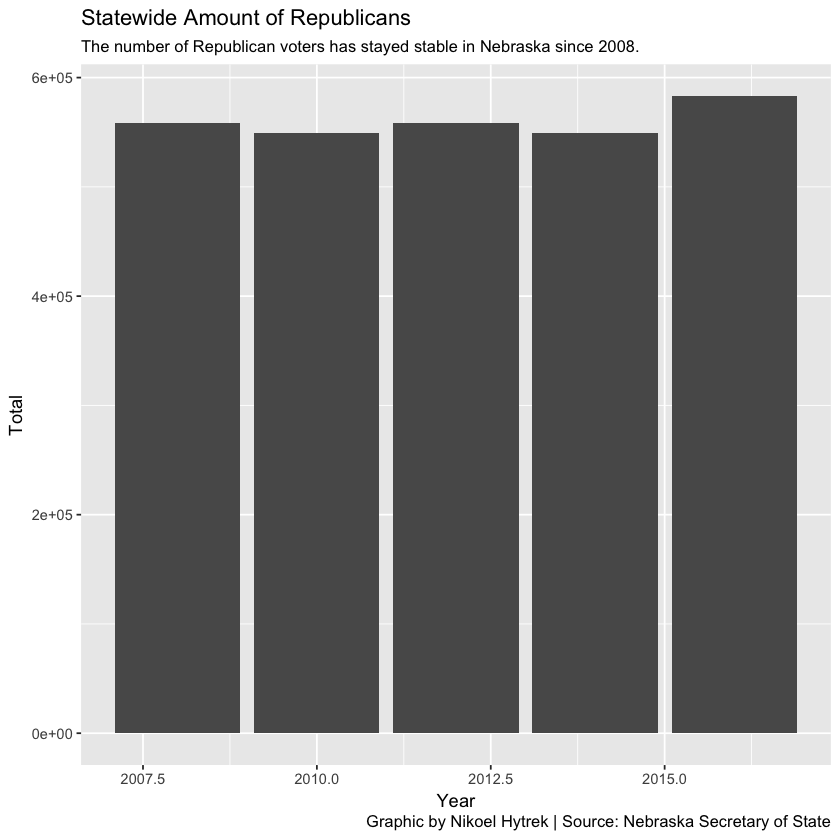

In [10]:
ggplot(statewider, aes(x=Year, weight=total)) + geom_bar() + labs(x="Year", y="Total", title="Statewide Amount of Republicans", subtitle="The number of Republican voters has stayed stable in Nebraska since 2008.", 
     caption="Graphic by Nikoel Hytrek | Source: Nebraska Secretary of State")

In [11]:
ggsave("rep.pdf", width=6, height=6)

In [12]:
statewided <- growth %>%
 select("Democrat", "Year") %>%
 group_by(Year) %>%
 summarize(total = sum(Democrat))

In [13]:
head(statewided)

Year,total
2008,393468
2010,380252
2012,374075
2014,352789
2016,370027


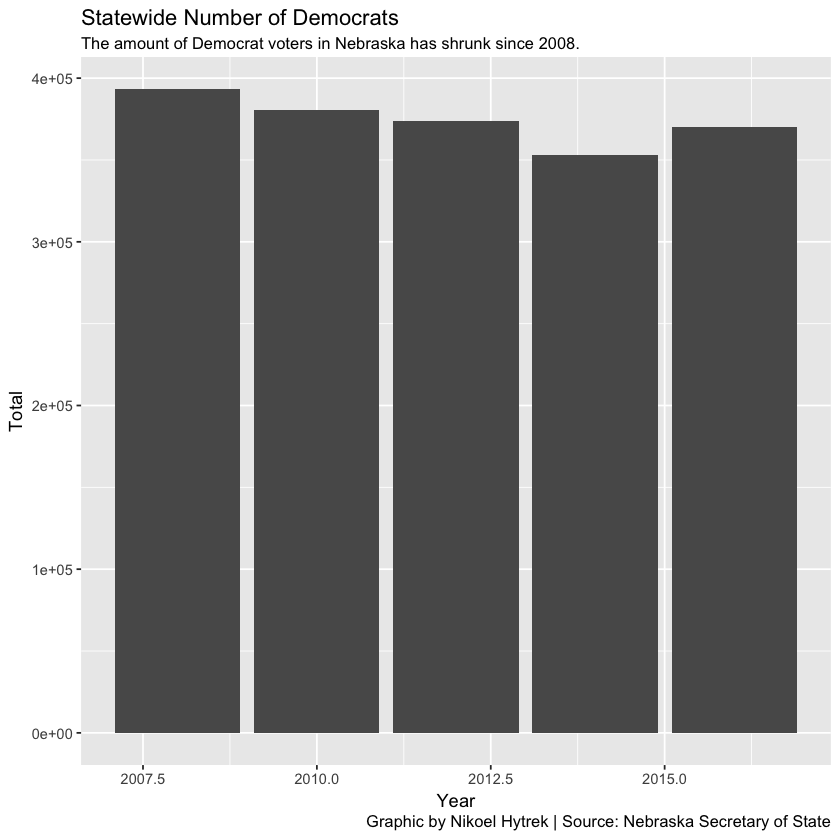

In [14]:
ggplot(statewided, aes(x=Year, weight=total)) + geom_bar() + labs(x="Year", y="Total", title="Statewide Number of Democrats", subtitle="The amount of Democrat voters in Nebraska has shrunk since 2008.", 
     caption="Graphic by Nikoel Hytrek | Source: Nebraska Secretary of State")

In [15]:
ggsave("dem.pdf", width=6, height=6)

In [16]:
statewidel <- growth %>%
 select("Libertarian", "Year") %>%
 group_by(Year) %>%
 summarize(total = sum(Libertarian))

In [17]:
head(statewidel)

Year,total
2008,472
2010,333
2012,3164
2014,5631
2016,11214


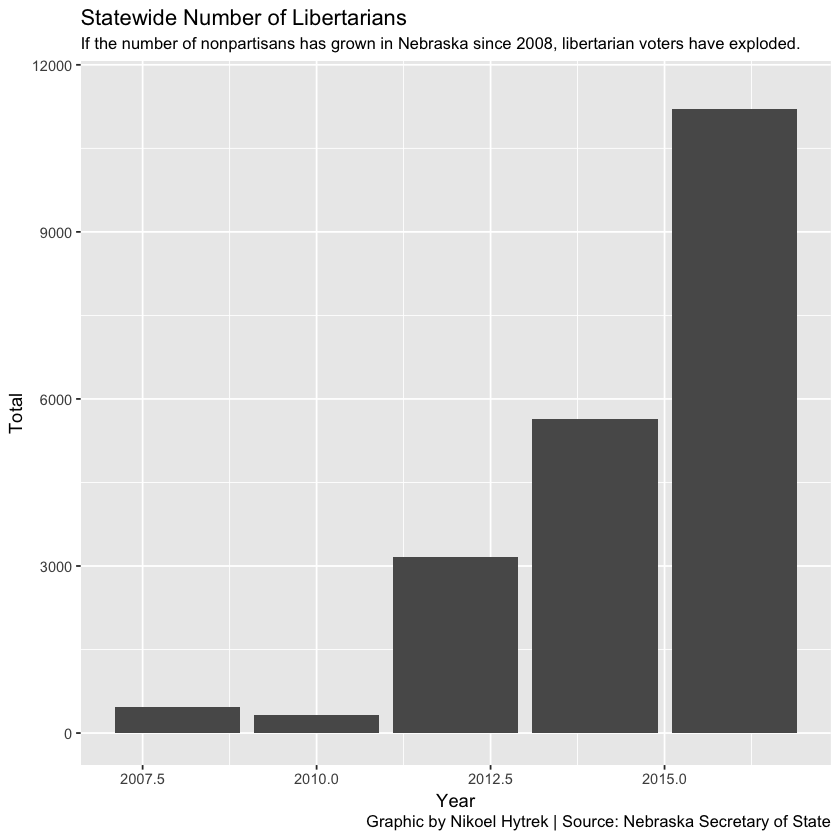

In [18]:
ggplot(statewidel, aes(x=Year, weight=total)) +geom_bar() + scale_y_continuous(limits = c(0, 11500)) + labs(x="Year", y="Total", title="Statewide Number of Libertarians", subtitle="If the number of nonpartisans has grown in Nebraska since 2008, libertarian voters have exploded.", 
     caption="Graphic by Nikoel Hytrek | Source: Nebraska Secretary of State")

In [19]:
ggsave("lib.pdf", width=6, height=6)

https://www.dropbox.com/s/e0yk6pccujkmu47/comparison.jpg?dl=0

This last set of graphs shows how Nonpartisan registration compares to other parties. I'm sure there's a way to do this in code, but I couldn't make it happen with my basic ability. So I did it the longer/harder way in Illustrator. For each party, I did the sum of voters for each year and made a bar graph of those numbers. Then I placed them all side-by-side so we can make comparisons, especially since the graphs aren't on the same scale.

To see specifics, I put the totals on top of each bar, and I made the largest bar slightly darker than the others.

All of these graphs but the Libertarian one have the 2012 spike, but if you ignore that, you can see the trend for each party, and you can compare how each one is growing. The two main parties have more stable numbers, but both of the alternative parties are growing.

In [20]:
totals <- growth %>%
 group_by(Year) %>%
 summarize(
     nonpartisans = sum(Nonpartisan),
     republicans = sum(Republican),
     democrats = sum(Democrat),
     libertarians = sum(Libertarian)
 )

longtotals <- melt(totals, id.vars = c('Year'))

head(longtotals)

Year,variable,value
2008,nonpartisans,195459
2010,nonpartisans,212461
2012,nonpartisans,228361
2014,nonpartisans,232628
2016,nonpartisans,246839
2008,republicans,558308


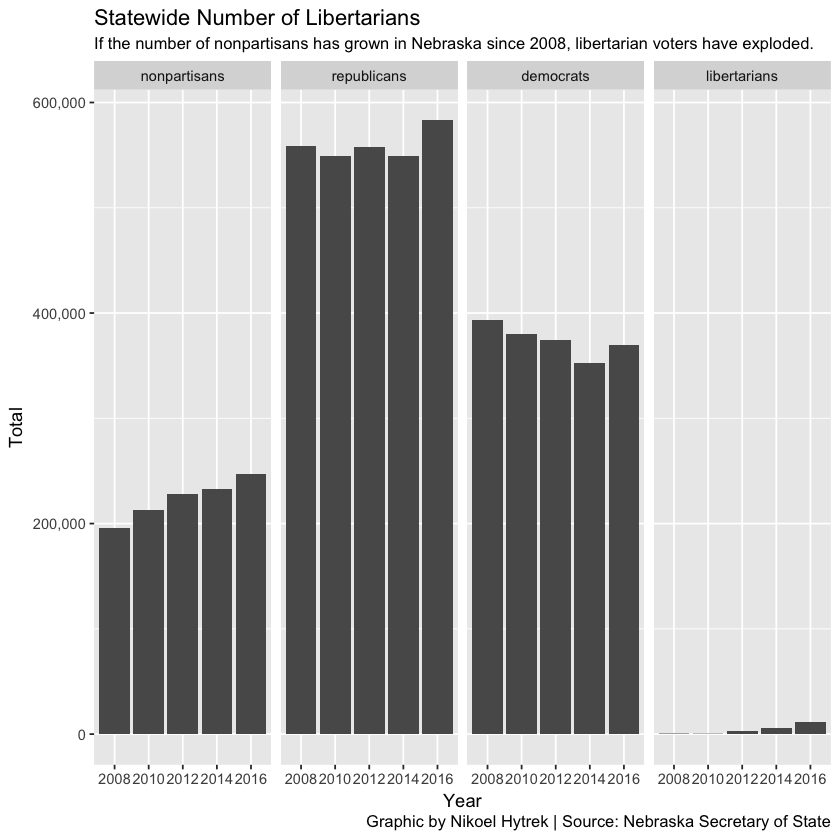

In [21]:
ggplot(longtotals, aes(x=as.character(Year), weight=value)) +geom_bar() + scale_y_continuous(labels = comma) + labs(x="Year", y="Total", title="Statewide Number of Libertarians", subtitle="If the number of nonpartisans has grown in Nebraska since 2008, libertarian voters have exploded.", 
     caption="Graphic by Nikoel Hytrek | Source: Nebraska Secretary of State") + facet_grid(. ~ variable)